In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'bayanpy', 'wurlitzer', 'leidenalg'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


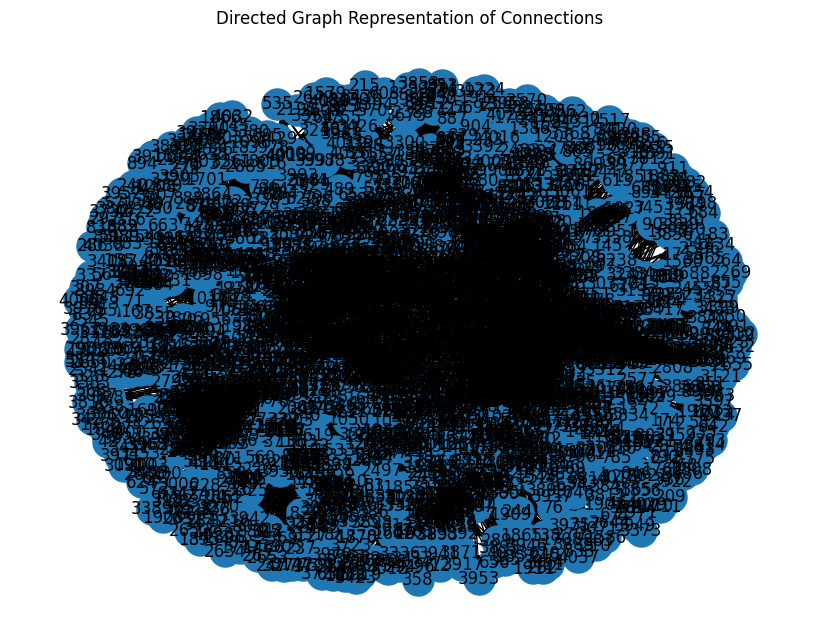

In [2]:
# Load data from connections.txt file
with open('connections.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Visualize the directed graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, arrows=True)
plt.title("Directed Graph Representation of Connections")
plt.show()

In [3]:
# Convert to undirected graph for finding bridges
undirected_G = G.to_undirected()

# Find bridges in the undirected graph
bridge_edges = list(nx.bridges(undirected_G))

# Nodes that are part of bridge edges
bridge_nodes = set()
for u, v in bridge_edges:
    bridge_nodes.add(u)
    bridge_nodes.add(v)

print("Nodes that are part of bridges:", bridge_nodes)

Nodes that are part of bridges: {0, 2569, 11, 12, 15, 18, 1560, 2079, 2596, 37, 550, 43, 1581, 3650, 1096, 585, 74, 602, 1119, 607, 608, 613, 107, 3183, 624, 114, 1145, 3709, 638, 3729, 2195, 1684, 668, 3230, 674, 3748, 686, 692, 1206, 698, 209, 210, 3798, 215, 2269, 3820, 3853, 3856, 2842, 287, 801, 292, 1834, 335, 348, 3935, 358, 1386, 875, 3437, 883, 1912, 3451, 891, 3453, 892, 3974, 3980, 911, 3984, 918, 2457, 414, 2470, 4008, 4010, 4015, 4022, 4024, 1466, 447, 4035, 3031, 3570, 3071}


In [4]:
# Calculate the density of the graph
num_nodes = len(G.nodes)
num_possible_edges = num_nodes * (num_nodes - 1)  # For a directed graph
density = nx.density(G)

print(f"Density of the graph: {density:.4f}")

Density of the graph: 0.0054


A density of 0.0054 indicates that the graph is quite sparse in terms of its connections.

In [5]:
# Calculate node degrees (in-degree + out-degree for a directed graph)
node_degrees = dict(G.degree())

# Find node with the highest degree
max_degree_node = max(node_degrees, key=node_degrees.get)
max_degree = node_degrees[max_degree_node]

# Find node with the lowest degree
min_degree_node = min(node_degrees, key=node_degrees.get)
min_degree = node_degrees[min_degree_node]

print(f"Node with the highest degree: {max_degree_node}, Degree: {max_degree}")
print(f"Node with the lowest degree: {min_degree_node}, Degree: {min_degree}")

Node with the highest degree: 107, Degree: 1045
Node with the lowest degree: 11, Degree: 1


In [6]:
# Calculate in-degree and out-degree for each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Find node with the highest in-degree
max_indegree_node = max(in_degrees, key=in_degrees.get)
max_indegree = in_degrees[max_indegree_node]

# Find node with the highest out-degree
max_outdegree_node = max(out_degrees, key=out_degrees.get)
max_outdegree = out_degrees[max_outdegree_node]

print(f"Node with the highest in-degree: {max_indegree_node}, In-degree: {max_indegree}")
print(f"Node with the highest out-degree: {max_outdegree_node}, Out-degree: {max_outdegree}")

Node with the highest in-degree: 1888, In-degree: 251
Node with the highest out-degree: 107, Out-degree: 1043


In [7]:
# Calculate centrality measures
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
try:
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)  # Adjust max_iter parameter
except nx.PowerIterationFailedConvergence:
    print("Eigenvector centrality calculation did not converge.")

# Find nodes with the highest closeness centrality
max_closeness_node = max(closeness, key=closeness.get)
max_closeness = closeness[max_closeness_node]

# Find nodes with the highest betweenness centrality
max_betweenness_node = max(betweenness, key=betweenness.get)
max_betweenness = betweenness[max_betweenness_node]

if 'eigenvector' in locals():  # Check if eigenvector centrality was successfully calculated
    # Find nodes with the highest eigenvector centrality
    max_eigenvector_node = max(eigenvector, key=eigenvector.get)
    max_eigenvector = eigenvector[max_eigenvector_node]

    print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}, Eigenvector: {max_eigenvector}")
else:
    print("Eigenvector centrality could not be calculated.")


Node with the highest eigenvector centrality: 2655, Eigenvector: 0.8027042996706522


In [8]:
# Convert to undirected for the community detection algorithm
G_undirected = G.to_undirected()

# Apply the Infomap algorithm for community detection
communities = algorithms.infomap(G_undirected)

# Print information about the communities
for idx, community in enumerate(communities.communities):
    print(f"Community {idx + 1}: {community}")


Community 1: [1976, 536, 3125, 3126, 3129, 3131, 3132, 3137, 3139, 3140, 3142, 3147, 3149, 3151, 3152, 3155, 3157, 3161, 3163, 3169, 3170, 3171, 3177, 3180, 3181, 3183, 3184, 3185, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3196, 3197, 3200, 3202, 3204, 3208, 3209, 3210, 3211, 3212, 3214, 3217, 3219, 3223, 3224, 3227, 3228, 3229, 3235, 3239, 3242, 3246, 3249, 3250, 3251, 3254, 3257, 3259, 3260, 3261, 3264, 3266, 3267, 3269, 3272, 3273, 3275, 3277, 3279, 3280, 3284, 3285, 3286, 3287, 3297, 3298, 3299, 3302, 3305, 3306, 3307, 3310, 3312, 3315, 3316, 3317, 3318, 3320, 3321, 3324, 3329, 3330, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3343, 3345, 3346, 3348, 3349, 3350, 3353, 3356, 3359, 3360, 3362, 3363, 3368, 3369, 3371, 3374, 3375, 3387, 3388, 3389, 3390, 3393, 3395, 3396, 3399, 3414, 3418, 3422, 3424, 3433, 3435, 2003, 2031, 2155, 2185, 1914, 1921, 1924, 1925, 1929, 1930, 1934, 1938, 1943, 1944, 1953, 1956, 1958, 1962, 1965, 1966, 1971, 1979, 1980, 1981, 1982, 1985, 1986, 1988, 199

In [9]:
# Apply the Infomap algorithm for community detection
communities = algorithms.infomap(G_undirected)

# Find the largest and smallest communities
largest_community = max(communities.communities, key=len)
smallest_community = min(communities.communities, key=len)

print(f"Largest community: {largest_community}")
print(f"Smallest community: {smallest_community}")


Largest community: [1976, 536, 3125, 3126, 3129, 3131, 3132, 3137, 3139, 3140, 3142, 3147, 3149, 3151, 3152, 3155, 3157, 3161, 3163, 3169, 3170, 3171, 3177, 3180, 3181, 3183, 3184, 3185, 3187, 3188, 3189, 3191, 3192, 3193, 3195, 3196, 3197, 3200, 3202, 3204, 3208, 3209, 3210, 3211, 3212, 3214, 3217, 3219, 3223, 3224, 3227, 3228, 3229, 3235, 3239, 3242, 3246, 3249, 3250, 3251, 3254, 3257, 3259, 3260, 3261, 3264, 3266, 3267, 3269, 3272, 3273, 3275, 3277, 3279, 3280, 3284, 3285, 3286, 3287, 3297, 3298, 3299, 3302, 3305, 3306, 3307, 3310, 3312, 3315, 3316, 3317, 3318, 3320, 3321, 3324, 3329, 3330, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3343, 3345, 3346, 3348, 3349, 3350, 3353, 3356, 3359, 3360, 3362, 3363, 3368, 3369, 3371, 3374, 3375, 3387, 3388, 3389, 3390, 3393, 3395, 3396, 3399, 3414, 3418, 3422, 3424, 3433, 3435, 2003, 2031, 2155, 2185, 1914, 1921, 1924, 1925, 1929, 1930, 1934, 1938, 1943, 1944, 1953, 1956, 1958, 1962, 1965, 1966, 1971, 1979, 1980, 1981, 1982, 1985, 1986, 198

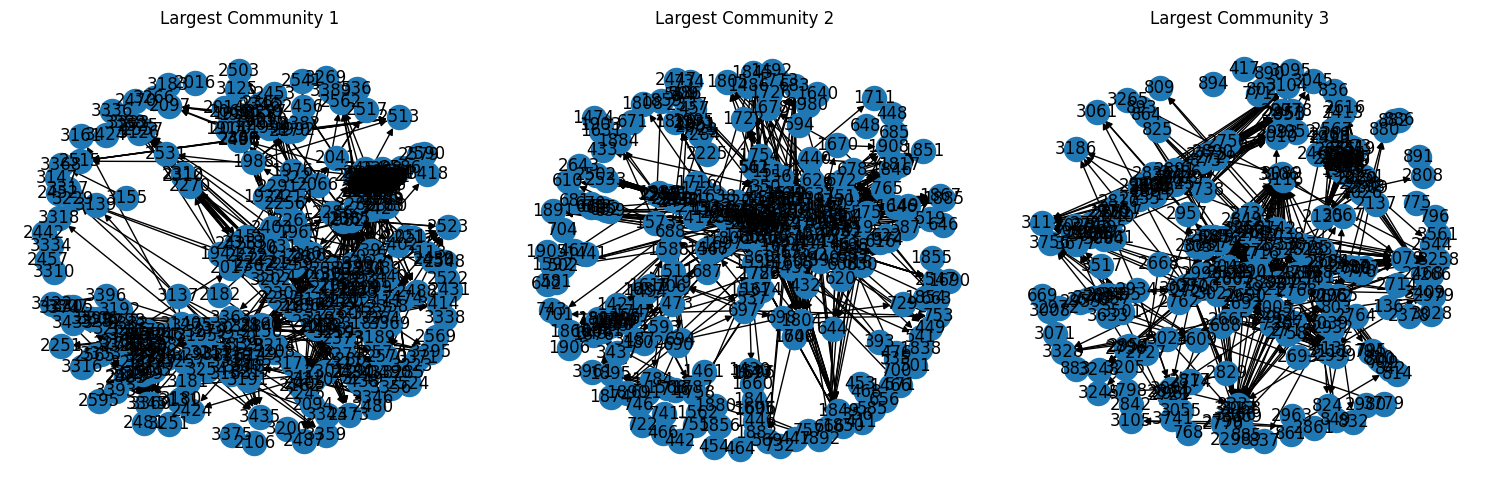

In [10]:
# Find the largest three communities
G_undirected = G.to_undirected()
communities = algorithms.infomap(G_undirected)
sorted_communities = sorted(communities.communities, key=len, reverse=True)[:3]

# Create a subgraph for each of the largest three communities
largest_communities = [G.subgraph(community) for community in sorted_communities]

# Draw the largest three communities
plt.figure(figsize=(15, 5))
for i, subgraph in enumerate(largest_communities, 1):
    plt.subplot(1, 3, i)
    nx.draw(subgraph, with_labels=True)
    plt.title(f"Largest Community {i}")

plt.tight_layout()
plt.show()


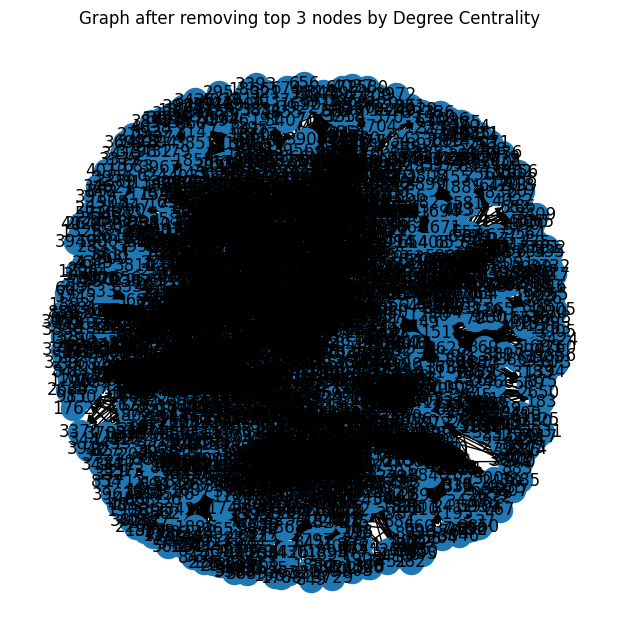

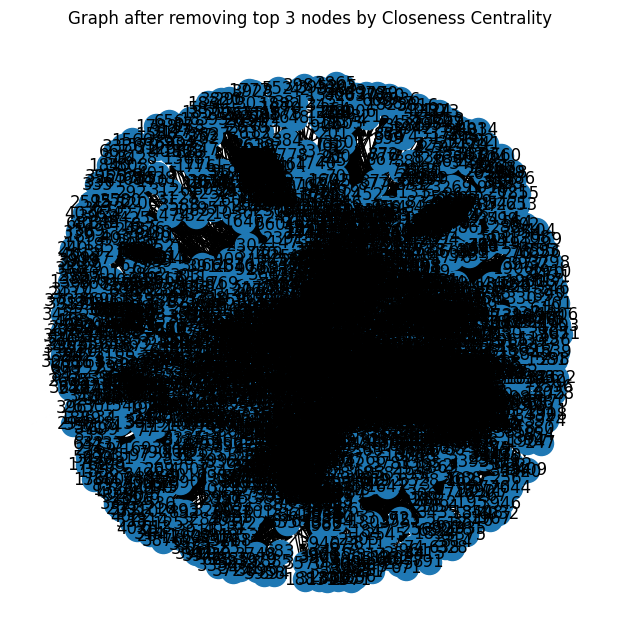

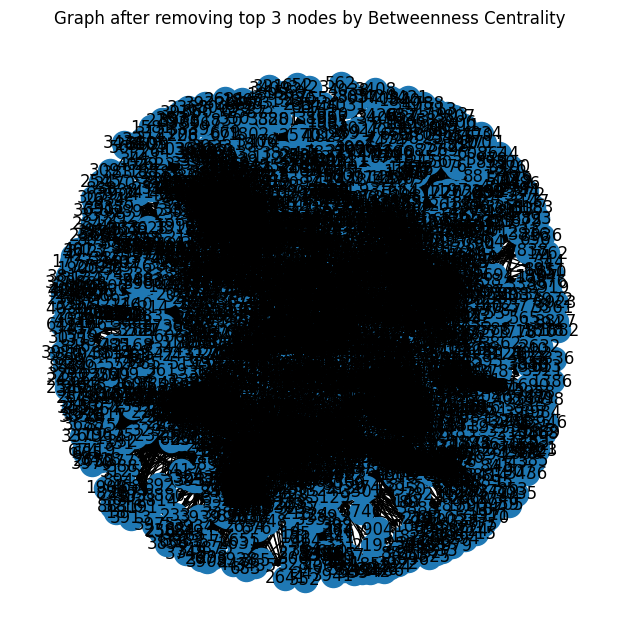

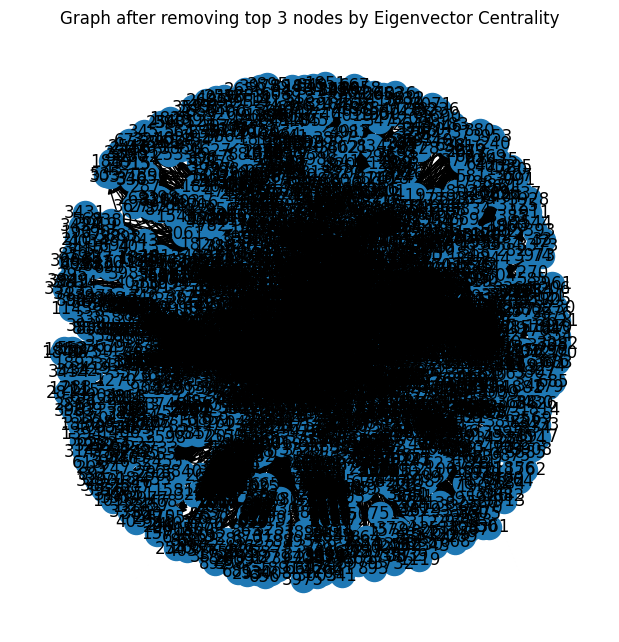

In [11]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {}

# Combine all centrality measures
centrality_measures = {
    "Degree Centrality": degree_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality
}

# Remove top 3 nodes based on each centrality measure and visualize the graph after removal
for measure, centrality in centrality_measures.items():
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]
    
    # Filter nodes that exist in the graph
    nodes_to_remove = [node for node in top_nodes if node in G]
    
    # Remove nodes and plot the graph after removal
    for node in nodes_to_remove:
        G.remove_node(node)
    
    plt.figure(figsize=(6, 6))
    nx.draw(G, with_labels=True)
    plt.title(f"Graph after removing top 3 nodes by {measure}")
    plt.show()


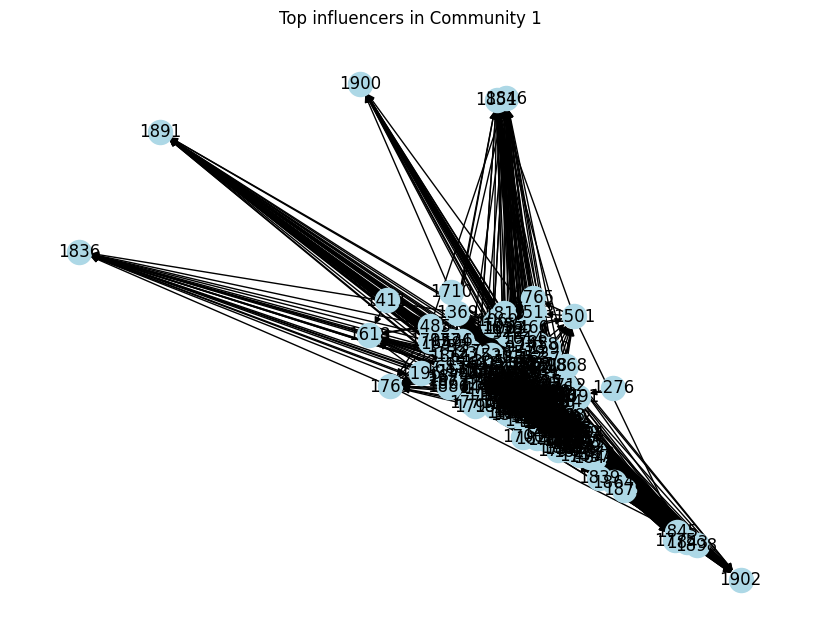

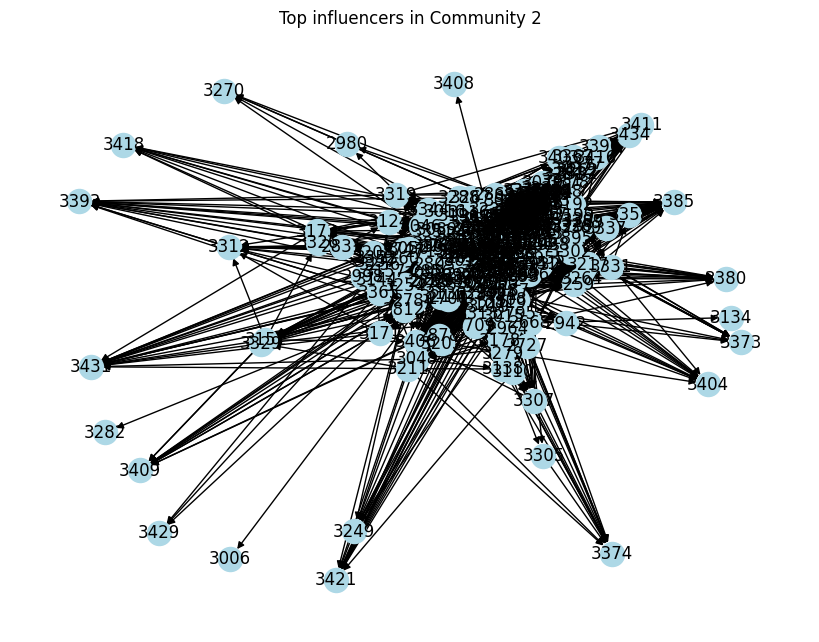

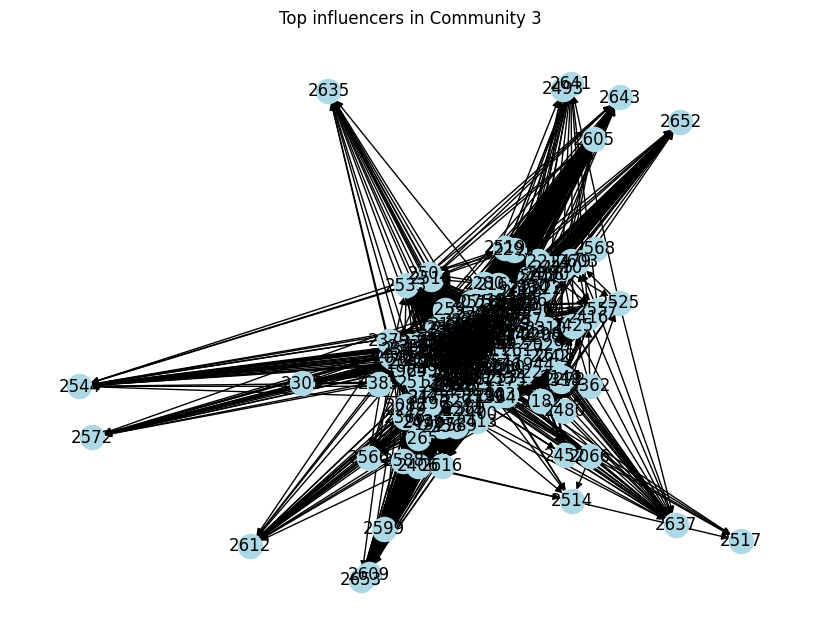

In [12]:
# Detect the top three communities using a community detection algorithm
G_undirected = G.to_undirected()  # Convert to undirected for community detection
communities = algorithms.infomap(G_undirected)
top_three_communities = sorted(communities.communities, key=len, reverse=True)[:3]

# Visualize the top influencers within the top three communities
for i, community_nodes in enumerate(top_three_communities, 1):
    community = G.subgraph(community_nodes)

    # Calculate centrality measures within the community
    degree_centrality = nx.degree_centrality(community)
    closeness_centrality = nx.closeness_centrality(community)
    betweenness_centrality = nx.betweenness_centrality(community)
    try:
        eigenvector_centrality = nx.eigenvector_centrality(community)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = {}

    # Combine or choose the nodes with the highest centrality measures
    top_influencers = []  # Fill this list with the top influencers

    # Create a subgraph of the community with the identified influencers
    influencers_subgraph = community.subgraph(top_influencers)

    # Visualize the influencers within the community
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(community)
    nx.draw(community, pos, with_labels=True, node_color='lightblue', node_size=300)
    nx.draw(influencers_subgraph, pos, with_labels=True, node_color='red', node_size=500, font_color='white')
    plt.title(f"Top influencers in Community {i}")
    plt.show()

# Hypothetical Business:
Company Name: ConnectTel - Telecom Solutions Provider

Hypothetical Details:
Marketing Agency Role: Promote new internet plans targeting specific customer segments.
Marketing Budget: $100,000
Cost Per Action: $5 (Advertisement cost per targeted customer)
Target Audience Selection:
Identify Potential Segments: Analyze data to find segments likely to purchase new internet plans. This could include:

Young professionals in urban areas.
Small businesses seeking cost-effective high-speed internet.
Families in suburban areas requiring reliable connectivity.
Data Analysis and Prediction:

Utilize predictive analytics on historical data to forecast potential customer response based on demographics, past interactions, and preferences.
Targeted Marketing Strategy:

Segment-Focused Campaigns: Design tailored campaigns for each segment highlighting unique selling propositions.
Social Media Targeting: Utilize targeted advertising on platforms frequented by each segment.
Content Creation: Develop engaging content (blogs, videos) focusing on each segment's needs and preferences.
Email Marketing: Deploy personalized email campaigns with special offers for targeted segments.
Geo-Targeted Ads: Employ location-based targeting for specific regions identified as high-potential markets.
Budget Allocation:

Allocate marketing budget proportionally based on segment potential and anticipated return on investment (ROI).
Use analytics tools to track the performance of campaigns and adjust spending for optimal results.
Testing and Optimization:

Implement A/B testing to refine advertising content and channels for better engagement.
Continuously analyze campaign performance and customer feedback to adjust strategies.
Measure Success Metrics:

Track conversion rates, click-through rates, and customer acquisition costs for each segment.
Analyze ROI for different marketing channels and adjust resources accordingly.
Customer Relationship Management (CRM):

Implement CRM tools to track customer interactions and improve customer engagement.
Decision on Targeting:
Target: Focus on young professionals in urban areas and small businesses requiring reliable, high-speed internet.
Reasoning: These segments are likely to respond positively to new internet plans and show potential for long-term value.
